In [2]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                          n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

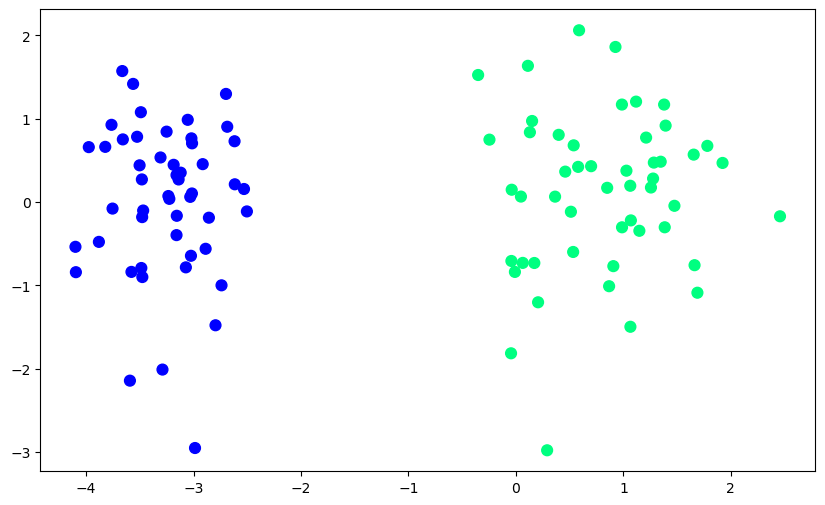

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=60)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None, solver='sag')
lor.fit(X,y)

C:\Users\Fazz Com 03364446969\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [11]:
lor.coef_

array([[4.77526541, 0.20807963]])

In [12]:
lor.intercept_

array([5.73972008])

In [14]:
m1 = -(lor.coef_[0][0] / lor.coef_[0][1])
b1 = -(lor.intercept_ / lor.coef_[0][1])

In [15]:
x1_input = np.linspace(-3,3,100)
y1_input = m1 * x1_input + b1

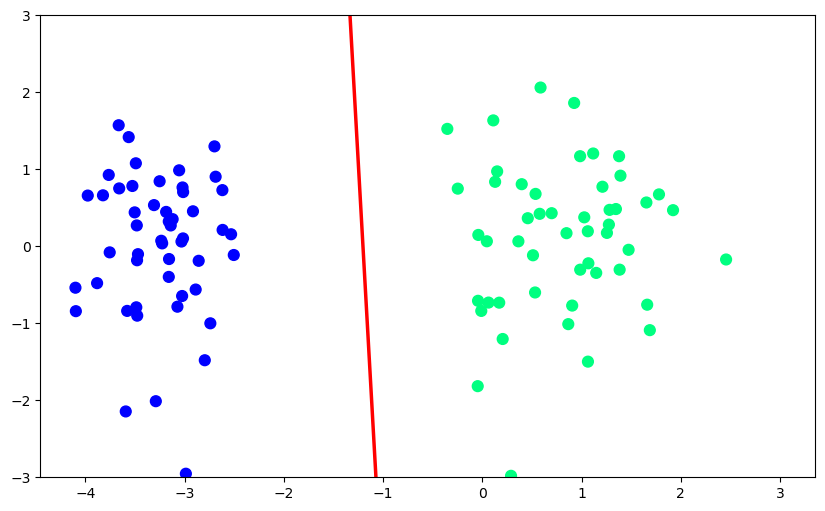

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=60)
plt.plot(x1_input, y1_input,c='red',linewidth=2.5)
plt.ylim(-3,3)
plt.show()

In [64]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
class MySigmoidGD:
    def __init__(self,epochs=1000,learning_rate=0.01):
        self.coef = None
        self.intercept = None
        self.epochs = epochs
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        omegas = np.ones(X.shape[1])

        for i in range(self.epochs):
            y_hat = sigmoid(np.dot(X, omegas))
            loss_der = (-1/X.shape[0]) * np.dot((y - y_hat),X)
            omegas -= self.learning_rate * loss_der

        self.intercept_ = omegas[0]
        self.coef_ = omegas[1:]

In [83]:
gd = MySigmoidGD(epochs=2500, learning_rate=0.5)
gd.fit(X,y)

In [84]:
gd.coef_

array([4.36410145, 0.17189254])

In [85]:
gd.intercept_

np.float64(5.1480294921597265)

In [86]:
m2 = -(gd.coef_[0]/gd.coef_[1])
b2 = -(gd.intercept_/gd.coef_[1])

In [87]:
y2_input = m2 * x1_input + b2

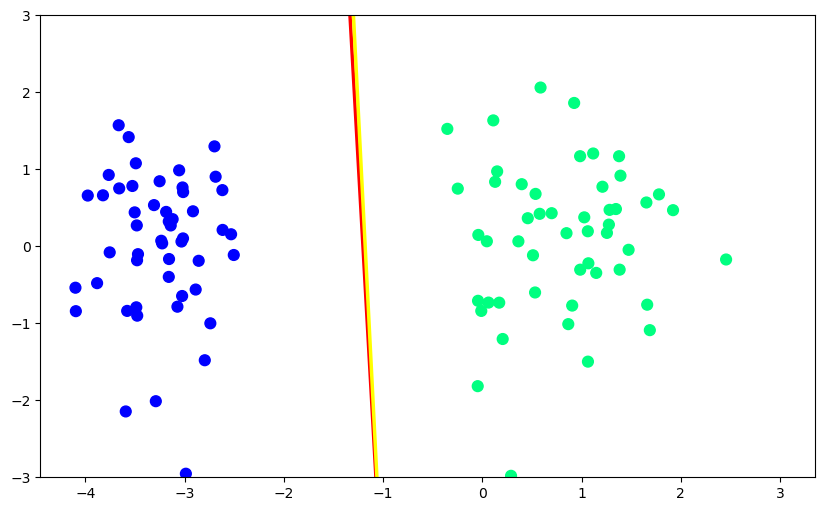

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=60)
plt.plot(x1_input, y1_input,c='red',linewidth=2.5)
plt.plot(x1_input, y2_input,c='yellow',linewidth=2.5)
plt.ylim(-3,3)
plt.show()